<a href="https://colab.research.google.com/github/Pavan-Gandham/ML-AI/blob/master/CropClassificationMLFinalYear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificaiton

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
import pickle

In [ ]:
data = pd.read_excel("/content/Data9.xlsx")

In [ ]:
data.head()

,Tmax,Tmin,RHI,RF,RHII,SSH,label
0,32.989258,23.200900,71.439352,0.000000,52.112283,8.715937,5
1,31.069074,19.587335,92.276059,0.000000,60.077425,8.298068,1
2,29.572746,22.190188,79.585379,7.351673,54.421700,6.017096,3
3,33.065589,22.631531,89.248138,0.000000,57.219870,8.901955,2
4,34.916616,23.204315,90.980770,0.000000,56.031808,7.180614,2


In [ ]:
data.dtypes

Tmax     float64
Tmin     float64
RHI      float64
RF       float64
RHII     float64
SSH      float64
label      int64
dtype: object

In [ ]:
data.size


70000

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tmax    10000 non-null  float64
 1   Tmin    10000 non-null  float64
 2   RHI     10000 non-null  float64
 3   RF      10000 non-null  float64
 4   RHII    10000 non-null  float64
 5   SSH     10000 non-null  float64
 6   label   10000 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 547.0 KB


In [ ]:
df = df.drop(labels=None, axis=0, index=None, columns=["RHII"], level=None, inplace=False, errors='raise')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tmax    10000 non-null  float64
 1   Tmin    10000 non-null  float64
 2   RHI     10000 non-null  float64
 3   RF      10000 non-null  float64
 4   SSH     10000 non-null  float64
 5   label   10000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 468.9 KB


In [ ]:
df['label'].unique()

array([5, 1, 3, 2, 4])

In [ ]:
df['label'].value_counts()

2    2066
3    2064
4    1997
1    1946
5    1927
Name: label, dtype: int64

<Axes: >

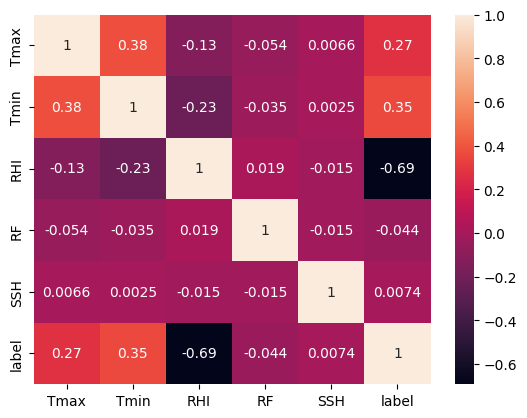

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
X= df.values[:,0:5]
Y=  df.values[:,5]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 100)

In [ ]:
Accuracies=[]

In [ ]:

##Logistic Regression
logreg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
logreg.fit(X_train,y_train)
y_pred= logreg.predict(X_test)
accuray=accuracy_score(y_test,y_pred)
Accuracies.append(accuray)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.93      0.94       218
         2.0       0.82      0.97      0.89       206
         3.0       0.97      0.82      0.89       231
         4.0       1.00      1.00      1.00       170
         5.0       0.99      1.00      0.99       175

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [ ]:
##Random Forest
randomForest = RandomForestClassifier(n_estimators = 100)
randomForest.fit(X_train,y_train)
predRandomForest_Y=randomForest.predict(X_test)
accuracy=accuracy_score(y_test,predRandomForest_Y)
Accuracies.append(accuracy)
print(classification_report(y_test, predRandomForest_Y))

              precision    recall  f1-score   support

         1.0       0.86      0.88      0.87       218
         2.0       0.89      0.90      0.89       206
         3.0       0.94      0.86      0.90       231
         4.0       0.77      0.82      0.80       170
         5.0       1.00      1.00      1.00       175

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



In [ ]:
sensor_data=[100,20,3,4,6,3]
prediction = randomForest.predict(
        sensor_data)

In [ ]:
##Gaussion Navie Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnbPred_Y=gnb.predict(X_test)
accuracy=accuracy_score(y_test,gnbPred_Y)
Accuracies.append(accuracy)
print(classification_report(y_test, gnbPred_Y))

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       218
         2.0       0.91      0.97      0.94       206
         3.0       1.00      0.93      0.96       231
         4.0       1.00      1.00      1.00       170
         5.0       1.00      1.00      1.00       175

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [ ]:
##Gradient Boosting
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
gbmPred_Y=gbm.predict(X_test)
accuracy=accuracy_score(y_test,gbmPred_Y)
Accuracies.append(accuracy)
print(classification_report(y_test, gbmPred_Y))

              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97       218
         2.0       0.93      0.98      0.95       206
         3.0       0.99      0.97      0.98       231
         4.0       1.00      1.00      1.00       170
         5.0       1.00      1.00      1.00       175

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
##SMO
smo = SVC(kernel='linear', C=1.0)
smo.fit(X_train, y_train)
smoPred_Y=smo.predict(X_test)
accuracy=accuracy_score(y_test,smoPred_Y)
Accuracies.append(accuracy)
print(classification_report(y_test, smoPred_Y))

              precision    recall  f1-score   support

         1.0       0.95      0.94      0.94       218
         2.0       0.93      0.95      0.94       206
         3.0       0.98      0.97      0.97       231
         4.0       1.00      1.00      1.00       170
         5.0       1.00      1.00      1.00       175

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



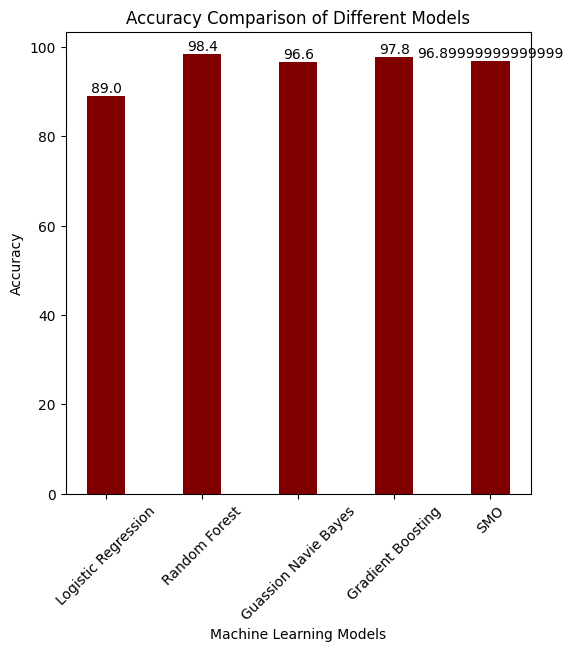

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models=['Logistic Regression','Random Forest','Guassion Navie Bayes','Gradient Boosting','SMO']
# creating the dataset

fig = plt.figure(figsize = (6,6))

# creating the bar plot

scaled_list = [x *100 for x in Accuracies]
plt.bar(models,scaled_list,  color ='maroon',
        width = 0.4)

plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xticks(models, rotation=45)
for i in range(len(models)):
    plt.text(models[i], scaled_list[i], str(scaled_list[i]), ha='center', va='bottom')
plt.show()


In [ ]:
k = 10  # Number of folds
cross_val_scores = cross_val_score(gbm, X, Y, cv=k)
average_cross_val_score = np.mean(cross_val_scores)
print(f"Average Cross-Validation Accuracy (k={k}): {average_cross_val_score:.2f}")

Average Cross-Validation Accuracy (k=10): 0.98


In [ ]:
pickle.dump(randomForest , open('randomForestFinal.pkl' , 'wb'))